In [1]:
import tensorflow as tf

In [2]:
import random
from data_loader import load_images_and_labels

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Preprocessing and Feature Engineering Data

In [4]:
directory = "caltech-101/101_ObjectCategories"
img_height = 128
img_width = 128

images, labels, class_names = load_images_and_labels(directory, img_height, img_width)

In [5]:
images = images / 255.0 # normalize image color values from 0-255 to 0-1
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=123)
 
print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Class Names: ['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ba

In [6]:
images[0]

array([[[0.35686275, 0.34117648, 0.29411766],
        [0.29411766, 0.29411766, 0.2627451 ],
        [0.3137255 , 0.3137255 , 0.28235295],
        ...,
        [0.60784316, 0.6039216 , 0.5882353 ],
        [0.59607846, 0.5921569 , 0.5764706 ],
        [0.6313726 , 0.627451  , 0.6117647 ]],

       [[0.3529412 , 0.3372549 , 0.3019608 ],
        [0.33333334, 0.3372549 , 0.3137255 ],
        [0.38431373, 0.38039216, 0.36078432],
        ...,
        [0.5764706 , 0.57254905, 0.5568628 ],
        [0.57254905, 0.5686275 , 0.5529412 ],
        [0.5921569 , 0.5882353 , 0.57254905]],

       [[0.56078434, 0.54901963, 0.5294118 ],
        [0.5372549 , 0.5372549 , 0.5294118 ],
        [0.5294118 , 0.53333336, 0.5137255 ],
        ...,
        [0.5921569 , 0.5882353 , 0.57254905],
        [0.58431375, 0.5803922 , 0.5647059 ],
        [0.6039216 , 0.6       , 0.58431375]],

       ...,

       [[0.5568628 , 0.5647059 , 0.50980395],
        [0.5294118 , 0.5372549 , 0.48235294],
        [0.5372549 , 0

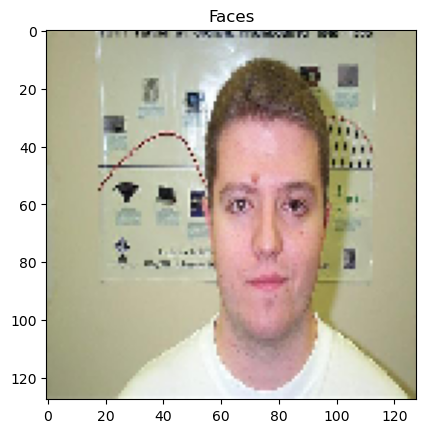

In [7]:
# show a random image
index = random.randint(0, len(x_train))
plt.imshow(x_train[index])
plt.title(class_names[y_train[index]])
plt.show()

# CNN Model

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 63, 63, 32)       128       
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               65028608  
                                                                 
 dropout_1 (Dropout)         (None, 512)              

In [15]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [16]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

history = model.fit(
    x_train, y_train, epochs=20, validation_split=0.2, callbacks=[checkpoint_callback]
)

Epoch 1/20
173/174 [============================>.] - ETA: 0s - loss: 9.5119 - accuracy: 0.2079
Epoch 1: val_accuracy improved from -inf to 0.11519, saving model to best_model.h5
174/174 [==============================] - 7s 40ms/step - loss: 9.4978 - accuracy: 0.2075 - val_loss: 4.4124 - val_accuracy: 0.1152
Epoch 2/20
173/174 [============================>.] - ETA: 0s - loss: 3.3670 - accuracy: 0.3062
Epoch 2: val_accuracy improved from 0.11519 to 0.23110, saving model to best_model.h5
174/174 [==============================] - 7s 38ms/step - loss: 3.3658 - accuracy: 0.3066 - val_loss: 4.4356 - val_accuracy: 0.2311
Epoch 3/20
173/174 [============================>.] - ETA: 0s - loss: 2.8886 - accuracy: 0.3804
Epoch 3: val_accuracy improved from 0.23110 to 0.34701, saving model to best_model.h5
174/174 [==============================] - 7s 39ms/step - loss: 2.8853 - accuracy: 0.3813 - val_loss: 3.4216 - val_accuracy: 0.3470
Epoch 4/20
173/174 [============================>.] - ETA: 0s

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

55/55 [==============================] - 0s 8ms/step - loss: 4.9259 - accuracy: 0.4453
Test accuracy: 0.44527649879455566


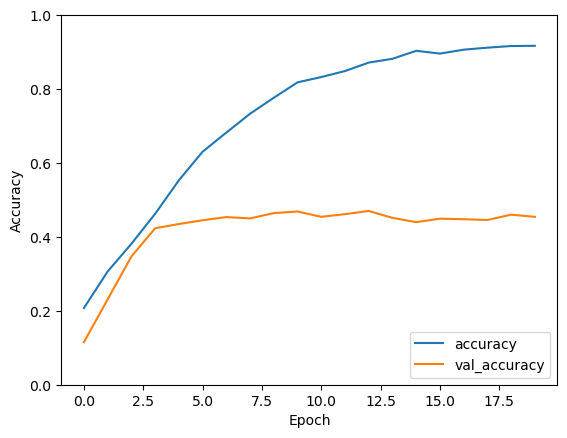

In [18]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Use transfer learning to improve results

In [8]:
base_model = tf.keras.applications.VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = True

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.001 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_transfer_learning_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

In [ ]:
# model = tf.keras.models.load_model("resnet_model_best_70_epochs.h5")

In [9]:
combined_history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

In [ ]:
def update_combined_history(new_history, combined_history):
    for key in new_history.history.keys():
        if key not in combined_history:
            combined_history[key] = new_history.history[key]
        else:
            combined_history[key].extend(new_history.history[key])

In [22]:
new_history = model.fit(
    x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback]
)

Epoch 1/20
174/174 [==============================] - ETA: 0s - loss: 0.7903 - accuracy: 0.7767
Epoch 1: val_accuracy did not improve from 0.57883
174/174 [==============================] - 23s 134ms/step - loss: 0.7903 - accuracy: 0.7767 - val_loss: 2.4486 - val_accuracy: 0.5695
Epoch 2/20
174/174 [==============================] - ETA: 0s - loss: 0.7904 - accuracy: 0.7776
Epoch 2: val_accuracy did not improve from 0.57883
174/174 [==============================] - 23s 130ms/step - loss: 0.7904 - accuracy: 0.7776 - val_loss: 2.4779 - val_accuracy: 0.5716
Epoch 3/20
174/174 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.7966
Epoch 3: val_accuracy did not improve from 0.57883
174/174 [==============================] - 24s 139ms/step - loss: 0.6917 - accuracy: 0.7966 - val_loss: 2.5451 - val_accuracy: 0.5745
Epoch 4/20
174/174 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.8028
Epoch 4: val_accuracy did not improve from 0.57883
174/174 [=

KeyboardInterrupt: 

In [25]:
new_history.history

{'loss': [4.251726150512695,
  3.6835055351257324,
  3.3383967876434326,
  3.1351072788238525,
  2.929595947265625,
  2.8159685134887695,
  2.6948862075805664,
  2.4948277473449707,
  2.400186777114868,
  2.2640092372894287,
  2.185455083847046,
  2.102057695388794,
  1.9628716707229614,
  1.8808773756027222,
  1.7766547203063965,
  1.7509387731552124,
  1.6542258262634277,
  1.561619520187378,
  1.48971688747406,
  1.3982359170913696],
 'accuracy': [0.1260806918144226,
  0.23865273594856262,
  0.2937680184841156,
  0.3243876099586487,
  0.3573487102985382,
  0.3771613836288452,
  0.4021974205970764,
  0.4338977038860321,
  0.44254323840141296,
  0.4774855971336365,
  0.4816282391548157,
  0.49981987476348877,
  0.5280979871749878,
  0.5430475473403931,
  0.5621397495269775,
  0.5677233338356018,
  0.5823127031326294,
  0.5945605039596558,
  0.6143732070922852,
  0.6334654092788696],
 'val_loss': [3.7069828510284424,
  3.333876132965088,
  3.2232892513275146,
  2.9309117794036865,
  2.

In [16]:
update_combined_history(new_history, combined_history)

In [50]:
tf.keras.backend.clear_session()

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

55/55 [==============================] - 2s 38ms/step - loss: 3.0899 - accuracy: 0.5524
Test accuracy: 0.5524193644523621


In [90]:
model.save("resnet_model_best_70_epochs.h5")

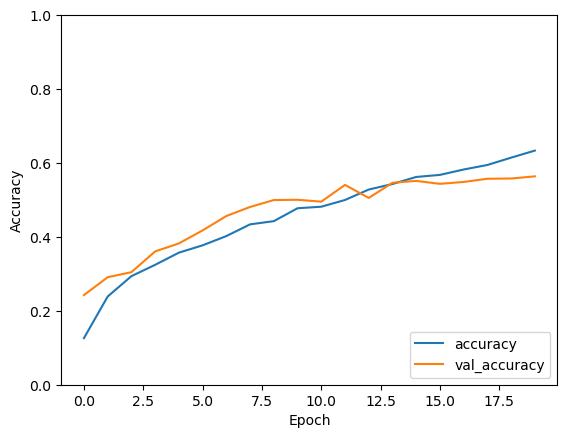

In [23]:
# plot training history
plt.plot(new_history.history['accuracy'], label='accuracy')
plt.plot(new_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 

In [6]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]